### Problem Statement 
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc

#### Feature Description
    id	                   Unique ID for the customer
    Gender	               Gender of the customer
    Age                    Age of the customer
    Driving_License	       0 : Customer does not have DL, 1 : Customer already has DL
    Region_Code	           Unique code for the region of the customer
    Previously_Insured	   1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
    Vehicle_Age	           Age of the Vehicle 
    Vehicle_Damage         1 : Customer got his/her vehicle damaged in the past.
                           0 : Customer didn't get his/her vehicle damaged in the past.
    Annual_Premium	       The amount customer needs to pay as premium in the year
    Policy_Sales_Channel   Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail,                            Over Phone, In Person, etc.
    Vintage	               Number of Days, Customer has been associated with the company
    Response               1 :  Customer is interested, 0 : Customer is not interested

In [15]:
### import python packages ###
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import joblib
import scipy.stats
from scipy.stats import probplot
from datetime import datetime, date, time

#### import train dataset

In [16]:
#### import the source file ####
df_src = pd.read_csv("C:\\Users\\krupakar\\Desktop\\PythonPractise\\Datasets\\Vidya_Analytics_Hackathon\\Cross_Sell_Prediction\\train.csv")
df_src.shape

(381109, 12)

In [17]:
#### drop duplicate rows ####
df_src = df_src.drop_duplicates(keep = 'first')
df_src.shape

(381109, 12)

In [18]:
#### dropping few variables, which may not be helpful for prediction ####
X_train = df_src.drop(labels = ['id'], axis = 1)
X_train.shape

(381109, 11)

In [19]:
#### renaming the feature names ####
X_train = X_train.rename(columns= {'Gender': 'gender', 'Age': 'age', 'Driving_License': 'driving_licence', 'Region_Code': 'region_cd', 
                                  'Previously_Insured': 'previously_insured', 'Vehicle_Age': 'vehicle_age', 'Vehicle_Damage' : 'vehicle_damage', 'Annual_Premium': 'annual_premium', 
                                   'Policy_Sales_Channel': 'policy_sales_channel', 'Vintage': 'vintage', 'Response': 'response'})
X_train.shape

(381109, 11)

In [20]:
#### chekcing the basic info of the X_train Dataset ####
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 11 columns):
gender                  381109 non-null object
age                     381109 non-null int64
driving_licence         381109 non-null int64
region_cd               381109 non-null float64
previously_insured      381109 non-null int64
vehicle_age             381109 non-null object
vehicle_damage          381109 non-null object
annual_premium          381109 non-null float64
policy_sales_channel    381109 non-null float64
vintage                 381109 non-null int64
response                381109 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [21]:
#### checking the "NAN" values columns in the X_train dataset ####
X_train.isna().sum()

gender                  0
age                     0
driving_licence         0
region_cd               0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

#### Observation : Non of the variables has NAN Values

In [22]:
#### chekcing the unique count of each variable in the X_train dataset ####
X_train.nunique()

gender                      2
age                        66
driving_licence             2
region_cd                  53
previously_insured          2
vehicle_age                 3
vehicle_damage              2
annual_premium          48838
policy_sales_channel      155
vintage                   290
response                    2
dtype: int64

#### Explanatory Data Analysis

#### 1. Response 

Percentage of Response(%) : 
0    87.743664
1    12.256336
Name: response, dtype: float64


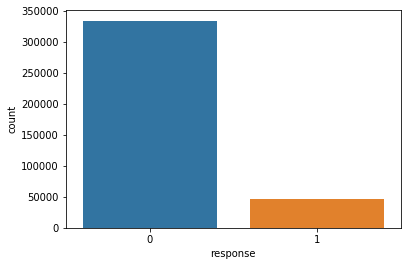

In [23]:
#### Analysis of Response variable  ####
print('Percentage of Response(%) : ')
print((X_train['response'].value_counts()/X_train.shape[0])*100)
sns.countplot(X_train['response'])
plt.show()

#### Observations: 
    1. Only 12.25% (46710) of the insurers have opted for Vechicle Insurance
    2. Imbalance dataset

#### 2. Annual Premium    

In [24]:
#### description of Annual Premium ####
X_train['annual_premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: annual_premium, dtype: float64

In [25]:
#### skewness of deposit ####
X_train['annual_premium'].skew()

1.7660872148961309

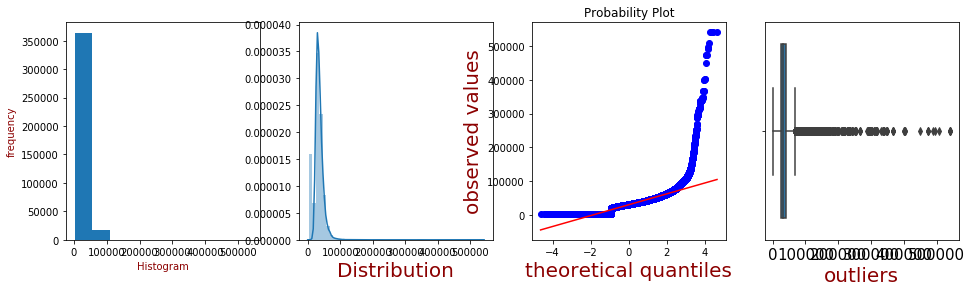

In [26]:
##### deposit distribution univariate plots #####

plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.hist(X_train['annual_premium'])
plt.xlabel("Histogram", fontsize = 10,  color = 'darkred')
plt.ylabel("frequency", fontsize = 10, color = 'darkred')

plt.subplot(1,4,2)
sns.distplot(X_train['annual_premium'] )
plt.xlabel("Distribution", fontsize = 20, color = 'darkred')

plt.subplot(1,4,3)
probplot(X_train['annual_premium'], dist= 'norm', plot= plt)
plt.xlabel("theoretical quantiles", fontsize = 20, color = 'darkred')
plt.ylabel("observed values", fontsize = 20, color = 'darkred')

plt.subplot(1,4,4)
sns.boxplot(X_train['annual_premium'], whis = 2)
plt.xlabel("outliers", fontsize = 20,  color = 'darkred')
plt.xticks(fontsize = 15)

plt.show()

#### Observations:
    1. Data is moderatley right skewed
    2. Presence of outliers

#### Handling Annual Premium Outliers

In [27]:
#### Creation of IQR, UPPER LIMIT for Annual Premium ####
#premium_Q1 = X_train['annual_premium'].quantile(0.25)
#premium_Q3 = X_train['annual_premium'].quantile(0.75)
#premium_IQR = (premium_Q3 - premium_Q1)
#premium_lower = premium_Q1 - (premium_IQR * 2)
#premium_uppper = premium_Q3 + (premium_IQR * 2)

In [28]:
#### Creation of IQR, UPPER LIMIT for Annual Premium ####
premium_lower = X_train['annual_premium'].quantile(0.01)
premium_uppper = X_train['annual_premium'].quantile(0.99)
premium_mean = X_train['annual_premium'].mean()
print(premium_lower) ; print(premium_uppper) ; print(premium_mean)

2630.0
72963.0
30564.389581458323


In [29]:
####creation of dataset with mean based on group by vehicle_damage and age ####
df_vehicle_age_age_m = pd.DataFrame(X_train.groupby(['vehicle_age', 'vehicle_damage', 'age'])['annual_premium'].mean())
df_vehicle_age_age_m = df_vehicle_age_age_m.reset_index()
df_vehicle_age_age_m.shape

(317, 4)

In [30]:
%%time
####  Handling Annual Premium Outliers ####
premium_outliers = [] #X_train.index

for i in X_train.index :
    if X_train['annual_premium'][i] >= premium_uppper :
        v_vehicle_age = X_train['vehicle_age'][i]
        v_age = X_train['age'][i]
        v_vehicle_damaged = X_train['vehicle_damage'][i]
        
        for j in df_vehicle_age_age_m.index :
            if (v_vehicle_age == df_vehicle_age_age_m['vehicle_age'][j]) & (v_vehicle_damaged == df_vehicle_age_age_m['vehicle_damage'][j]) & (v_age == df_vehicle_age_age_m['age'][j]) :
                premium_outliers.append(df_vehicle_age_age_m['annual_premium'][j])
    elif  X_train['annual_premium'][i] <= premium_lower :
        
        v_vehicle_age = X_train['vehicle_age'][i]
        v_age = X_train['age'][i]
        v_vehicle_damaged = X_train['vehicle_damage'][i]
                                                                            
        for j in df_vehicle_age_age_m.index :
            if (v_vehicle_age == df_vehicle_age_age_m['vehicle_age'][j]) & (v_vehicle_damaged == df_vehicle_age_age_m['vehicle_damage'][j]) & (v_age == df_vehicle_age_age_m['age'][j]) :
                premium_outliers.append(df_vehicle_age_age_m['annual_premium'][j])
    else: 
        premium_outliers.append(X_train['annual_premium'][i])
        

Wall time: 26min 22s


In [31]:
#### adding new column "annual_premium_o" ####
X_train['annual_premium_o'] = premium_outliers
print(X_train.shape)

(381109, 12)


#### Observations: 
    1. Outliers are handled

#### 3. Age

In [32]:
#### description of Age ####
X_train['age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: age, dtype: float64

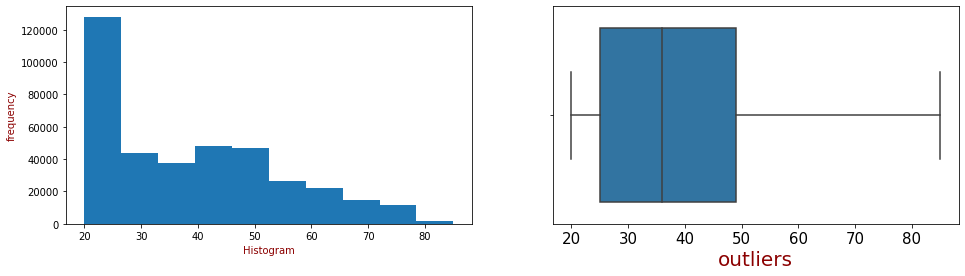

In [33]:
##### Age distribution univariate plots #####
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.hist(X_train['age'])
plt.xlabel("Histogram", fontsize = 10,  color = 'darkred')
plt.ylabel("frequency", fontsize = 10, color = 'darkred')

plt.subplot(1,2,2)
sns.boxplot(X_train['age'], whis = 2)
plt.xlabel("outliers", fontsize = 20,  color = 'darkred')
plt.xticks(fontsize = 15)

plt.show()

#### Observations:
    1. 25% of the people who own vehicle are between 20 to 25 yrs old
    2. 25% of the people who own vehicle are between 49 to 85 yrs old
    3. 50% of the people who own vehicle are between 25 to 49 yrs old
    4. Therefore based on data distribution, we create 4 age bins
    5. No outliers

In [34]:
#### creation of age bins based on 4 quantiles ####
X_train['age_bins'] = pd.qcut(X_train['age'], labels=['1st-quartile', '2nd-quartile', '3rd-quartile', '4th-quartile'], q=4)
print(X_train.shape)

(381109, 13)


#### 4. Vintage

In [35]:
#### description of Vintage ####
X_train['vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: vintage, dtype: float64

In [36]:
#### Skewness of the Vintage ####
X_train['vintage'].skew()

0.0030295168899980816

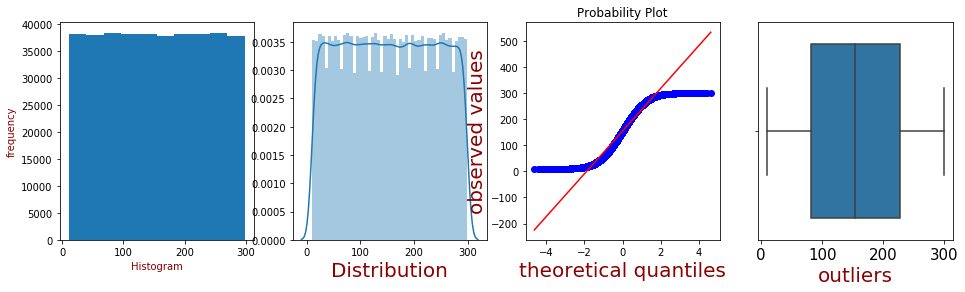

In [37]:
##### Vintage distribution univariate plots #####

plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.hist(X_train['vintage'])
plt.xlabel("Histogram", fontsize = 10,  color = 'darkred')
plt.ylabel("frequency", fontsize = 10, color = 'darkred')

plt.subplot(1,4,2)
sns.distplot(X_train['vintage'] )
plt.xlabel("Distribution", fontsize = 20, color = 'darkred')

plt.subplot(1,4,3)
probplot(X_train['vintage'], dist= 'norm', plot= plt)
plt.xlabel("theoretical quantiles", fontsize = 20, color = 'darkred')
plt.ylabel("observed values", fontsize = 20, color = 'darkred')

plt.subplot(1,4,4)
sns.boxplot(X_train['vintage'], whis = 2)
plt.xlabel("outliers", fontsize = 20,  color = 'darkred')
plt.xticks(fontsize = 15)

plt.show()

#### Observations :
    1. Data is uniformly distributed
    2. Data is not skewed and No outliers 

#### 5. Gender

Percentage of Gender(%) : 
Male      54.07613
Female    45.92387
Name: gender, dtype: float64


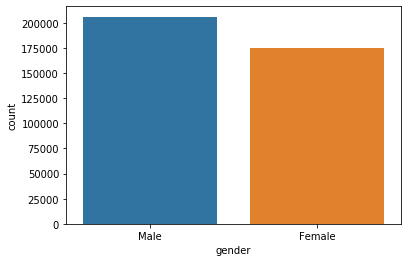

In [38]:
#### Analysis of Gender variable  ####
print('Percentage of Gender(%) : ')
print((X_train['gender'].value_counts()/X_train.shape[0])*100)
sns.countplot(X_train['gender'])
plt.show()

#### Observations: 
    1. 54% of males and 46% of the females owns the Vechicle

#### 6. Driving Licence             

Percentage of Driving Licence(%) : 
1    99.786938
0     0.213062
Name: driving_licence, dtype: float64


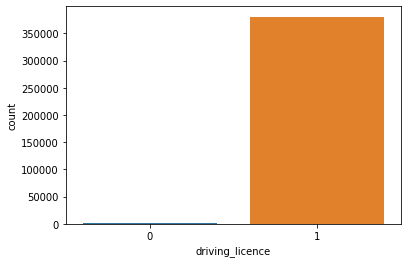

In [39]:
#### Analysis of Driving Licence variable  ####
print('Percentage of Driving Licence(%) : ')
print((X_train['driving_licence'].value_counts()/X_train.shape[0])*100)
sns.countplot(X_train['driving_licence'])
plt.show()

#### Observations:
    1. 99.8% of the Insured people has Driving Licence
    2. Only 0.2% (812 records) of the Health Insured people doesn't have Driving Licence
    3. It's a Quasi-Constant variable, drop records who doesn't hold Driving Licence

#### 7. Region Code

In [40]:
#### Analysis of Region Code variable  ####
print('Percentage of Insurers from each region (%) : ')
((X_train['region_cd'].value_counts()/X_train.shape[0])*100).head(10)

Percentage of Insurers from each region (%) : 


28.0    27.922458
8.0      8.889058
46.0     5.181982
41.0     4.792067
15.0     3.491914
30.0     3.198822
29.0     2.903369
50.0     2.687683
3.0      2.427390
11.0     2.422404
Name: region_cd, dtype: float64

In [41]:
#### Creation of Handling Rare Labels Function ####
def f_find_frequent_labels (dataframe, var, threshold) :
    tmp = dataframe.groupby([var]).size()/dataframe.shape[0]
    frequent_ls = tmp[tmp > threshold].index
    return frequent_ls

In [42]:
#### Handling rare labels of Region categories based on Frequency distribution ####
freq_region_lst = f_find_frequent_labels(X_train, "region_cd", 0.01)

In [43]:
#### Handling Rare label for region code #####
X_train["region_cd_rare"] = np.where(X_train["region_cd"].isin(freq_region_lst), X_train["region_cd"], 100 )

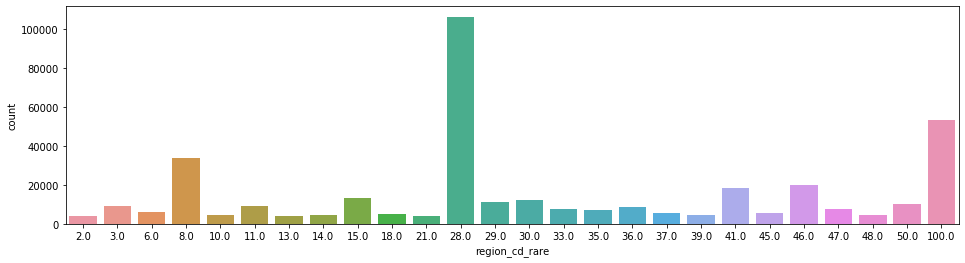

In [44]:
#### Analysis after handling rare values ####
plt.figure(figsize= (16, 4))
sns.countplot(X_train['region_cd_rare'])
plt.show()

#### Observations :
    1. 28 regions has less than 1% of the Insurers and these are grouped as region no - 100 
    2. Region no - 28, has highest no of Insurers i.e. 28% (106415 Insurers)

#### 8. Previously Insured

Percentage of Previously Insured(%) : 
0    54.178988
1    45.821012
Name: previously_insured, dtype: float64


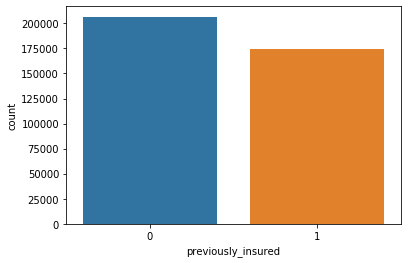

In [45]:
#### Analysis of Previously Insured variable  ####
print('Percentage of Previously Insured(%) : ')
print((X_train['previously_insured'].value_counts()/X_train.shape[0])*100)
sns.countplot(X_train['previously_insured'])
plt.show()

#### Observations:
    1. 46% of the Insurers are Previously Insured
    2. 54% of the Insurers are newly first time Insured customers

#### 9. Vehicle Age             

Percentage of Vehicle Age(%) : 
1-2 Year     52.561341
< 1 Year     43.238549
> 2 Years     4.200111
Name: vehicle_age, dtype: float64


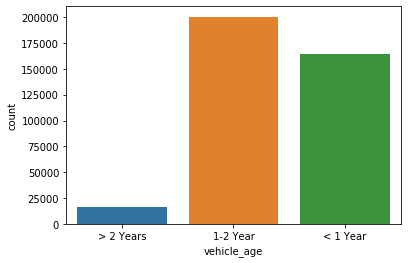

In [46]:
#### Analysis of Vehicle Age variable  ####
print('Percentage of Vehicle Age(%) : ')
print((X_train['vehicle_age'].value_counts()/X_train.shape[0])*100)
sns.countplot(X_train['vehicle_age'])
plt.show()

#### Observations:
    1. Only 4% of the Vehicles are older than 2 yrs
    2. 43% of the Vehicles are less than 1 yr old or newly taken
    3. 53% of the Vehicle are between 1 & 2 yrs old

#### 10. Vehicle Damage

Percentage of Vehicle Damage(%) : 
Yes    50.487656
No     49.512344
Name: vehicle_damage, dtype: float64


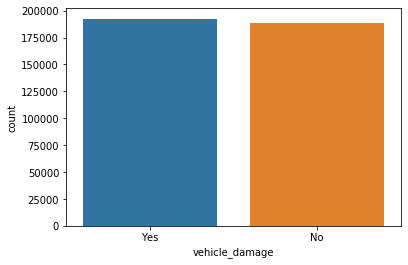

In [47]:
#### Analysis of Vehicle Damage variable  ####
print('Percentage of Vehicle Damage(%) : ')
print((X_train['vehicle_damage'].value_counts()/X_train.shape[0])*100)
sns.countplot(X_train['vehicle_damage'])
plt.show()

#### Observations:
    1. Both damaged and un-damaged vehicle are equal proportionate i.e. 50%

#### 11. Policy Sales Channel      

In [48]:
#### Analysis of Policy Sales Channel variable  ####
print('Percentage of Policy Sales Channel (%) : ')
((X_train['policy_sales_channel'].value_counts()/X_train.shape[0])*100).head(10)

Percentage of Policy Sales Channel (%) : 


152.0    35.366260
26.0     20.912652
124.0    19.415705
160.0     5.714638
156.0     2.797362
122.0     2.605554
157.0     1.753829
154.0     1.572516
151.0     1.019393
163.0     0.759100
Name: policy_sales_channel, dtype: float64

In [49]:
#### Handling rare labels of Policy Sales channel categories based on Frequency distribution ####
freq_sales_channel_lst = f_find_frequent_labels(X_train, "policy_sales_channel", 0.01)

In [50]:
#### Handling Rare label for Policy Sales channel #####
X_train["sales_channel_rare"] = np.where(X_train["policy_sales_channel"].isin(freq_sales_channel_lst), X_train["policy_sales_channel"], 1000 )

Percentage of Sale Channel data: 


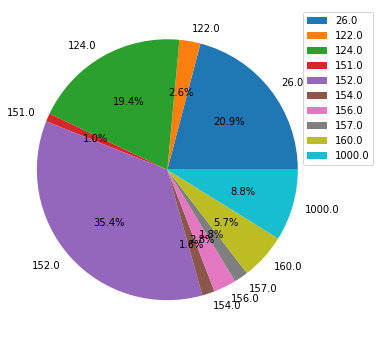

In [51]:
#### Analysis after handling rare values ####
plt.figure(figsize=(10,6))
print("Percentage of Sale Channel data: ")
labels = X_train.groupby(['sales_channel_rare'])['sales_channel_rare'].count().index
plt.pie(X_train.groupby(['sales_channel_rare'])['sales_channel_rare'].count()/X_train.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.legend()
plt.xlim(1)
plt.show()

#### Observations: 
      1. 146 sales channels has less than 1% of the Insurers and these are grouped as sales channel no - 1000
      2. Sales Channel no - 152, has highest no of Insurers i.e. 35% (134784 Insurers)

#### Label Encoding ####

In [52]:
#### 1. gender ####
X_train['gender_le'] = np.where(X_train['gender'] == 'Female', 0, 1)

In [53]:
#### 2.vehicle damage ####
X_train['vehicle_damage_le'] = np.where(X_train['vehicle_damage'] == 'Yes', 1, 0)

#### Pickling the X_train dataset ####

In [54]:
#### pickling the train dataset ####
print(X_train.shape)
joblib.dump(X_train, "X_train_eda.pkl")

(381109, 17)


['X_train_eda.pkl']

In [55]:
#### pickling the outliers details ####
joblib.dump((premium_lower, premium_uppper, df_vehicle_age_age_m, premium_mean), "premium_outlier.pkl")

['premium_outlier.pkl']

In [56]:
#### pickling frequent categories for region and sales channel ####
joblib.dump((freq_region_lst, freq_sales_channel_lst ), "frequent_categories.pkl")

['frequent_categories.pkl']